In [1]:
import sys
sys.path.append('../')

from Functions.pre_processing_functions import *
import pandas as pd
from sklearn.cluster import KMeans
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


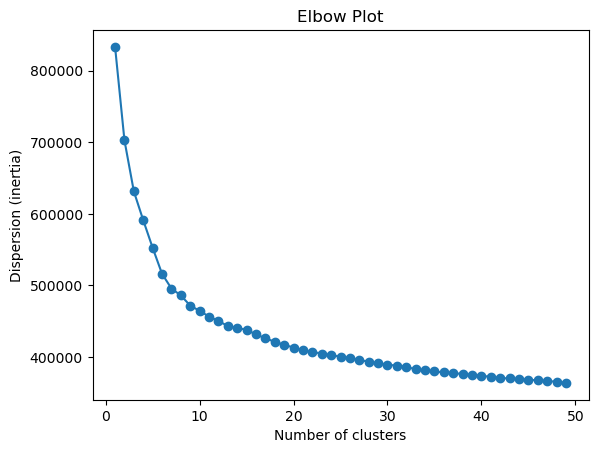

In [2]:
data = preprocess('../Data/customer_info.csv')  
data = data.select_dtypes(include=['int64', 'float64'])

dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    dispersion.append(kmeans.inertia_)

plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Elbow Plot')
plt.show()


By developing the elbow graph we were able to detect that the right number of clusters to use on our Kmeans method is 7-10 clusters

In [3]:
def kmeans_clustering(path, n_clusters = 10, random_state = 42):
    data = preprocess(path)  
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data)

    # Add cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['Kmeans_cluster'] = cluster_labels

    return data_with_clusters

In [4]:
kmeans_clustering('../Data/customer_info.csv', n_clusters=11)

,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,Kmeans_cluster
0,-0.746487,0.522554,-0.041784,-0.020744,1.722374,0.645627,1.283570,1.653426,-0.528771,0.045796,0.731051,2.001326,4
1,-0.702610,-1.013639,0.175332,0.077053,-1.336102,-1.247776,-0.322993,-0.737079,-0.659574,-1.005888,-0.613592,-0.702951,8
2,-0.349558,0.156583,0.175332,1.252090,1.786389,1.770743,0.768045,1.772334,0.432525,-0.194500,-0.839918,1.422455,1
3,-0.459506,3.493649,0.175332,-1.055014,-0.742188,1.741718,0.048185,-0.059151,-1.189013,0.879029,-0.320699,0.575749,2
4,1.359075,-0.140940,0.175332,-0.714209,0.883072,-0.491439,0.130669,1.032636,0.694130,-0.890421,-1.159437,0.774466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,2.022875,0.425679,0.609564,0.108170,0.178911,1.176600,-0.424223,1.333765,0.698283,-0.057188,-0.400579,0.074637,7
34056,-0.325233,0.024381,-0.041784,-0.352659,0.961312,-0.240465,0.537465,-0.394254,0.492736,-0.419192,0.005476,1.940847,0
34057,-0.399022,1.401049,0.826680,-0.500835,-0.767083,-0.598999,-0.757908,1.001751,-0.713556,1.269119,-1.385763,0.636228,2
34058,0.758298,0.274433,-0.910248,-0.807560,0.025987,-0.540951,0.595579,0.124615,0.781332,0.011468,0.384905,-0.029042,0


In [5]:
kmeans_clustering('../Data/customer_info.csv', n_clusters=9)

,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,Kmeans_cluster
0,-0.746487,0.522554,-0.041784,-0.020744,1.722374,0.645627,1.283570,1.653426,-0.528771,0.045796,0.731051,2.001326,4
1,-0.702610,-1.013639,0.175332,0.077053,-1.336102,-1.247776,-0.322993,-0.737079,-0.659574,-1.005888,-0.613592,-0.702951,8
2,-0.349558,0.156583,0.175332,1.252090,1.786389,1.770743,0.768045,1.772334,0.432525,-0.194500,-0.839918,1.422455,1
3,-0.459506,3.493649,0.175332,-1.055014,-0.742188,1.741718,0.048185,-0.059151,-1.189013,0.879029,-0.320699,0.575749,2
4,1.359075,-0.140940,0.175332,-0.714209,0.883072,-0.491439,0.130669,1.032636,0.694130,-0.890421,-1.159437,0.774466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,2.022875,0.425679,0.609564,0.108170,0.178911,1.176600,-0.424223,1.333765,0.698283,-0.057188,-0.400579,0.074637,7
34056,-0.325233,0.024381,-0.041784,-0.352659,0.961312,-0.240465,0.537465,-0.394254,0.492736,-0.419192,0.005476,1.940847,0
34057,-0.399022,1.401049,0.826680,-0.500835,-0.767083,-0.598999,-0.757908,1.001751,-0.713556,1.269119,-1.385763,0.636228,2
34058,0.758298,0.274433,-0.910248,-0.807560,0.025987,-0.540951,0.595579,0.124615,0.781332,0.011468,0.384905,-0.029042,0


In [6]:
def umap_kmeans(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude 'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['Kmeans_cluster'], errors='ignore')
    features_scaled = features.values

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['Kmeans_cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters - Kmeans")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


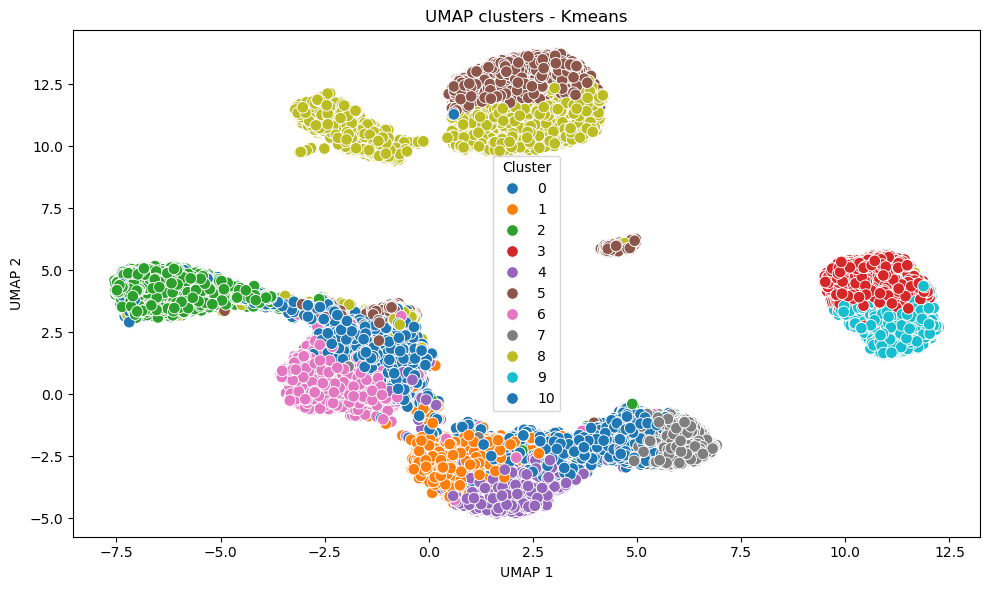

In [7]:
umap_kmeans(kmeans_clustering('../Data/customer_info.csv', n_clusters=11))

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


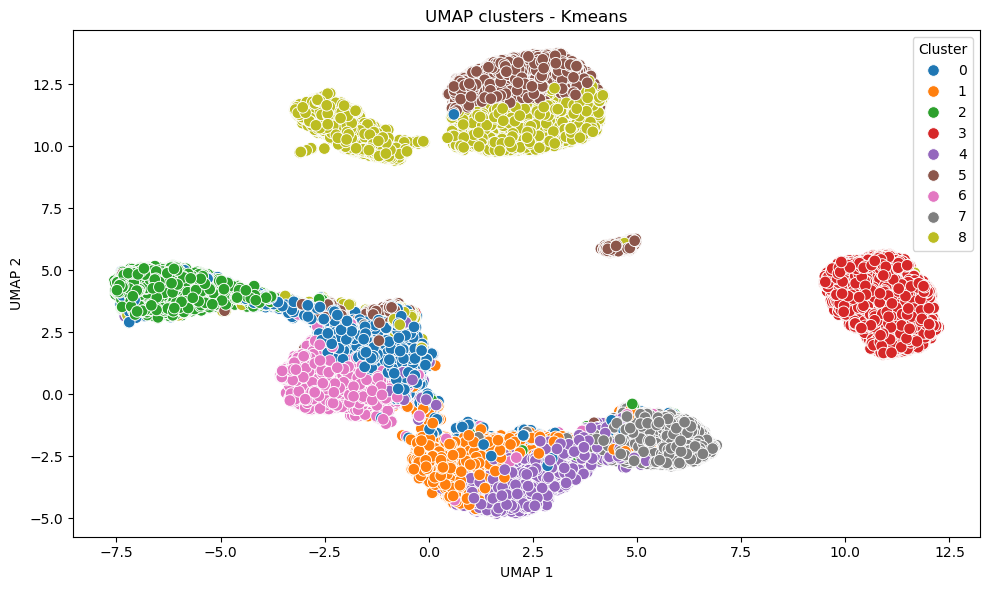

In [8]:
umap_kmeans(kmeans_clustering('../Data/customer_info.csv', n_clusters=9))

In [9]:
def hierarchical_clustering(path, n_clusters= 10, linkage= 'ward') :
   
    data = preprocess(path) 
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = model.fit_predict(data)

    # Add the cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['hierarchical_cluster'] = cluster_labels

    return data_with_clusters

In [10]:
def umap_hierarchical(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['hierarchical_cluster'], errors='ignore')
    features_scaled = features.values

    reduce = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reduce.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['hierarchical_cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters - Hierarchical Clustering")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


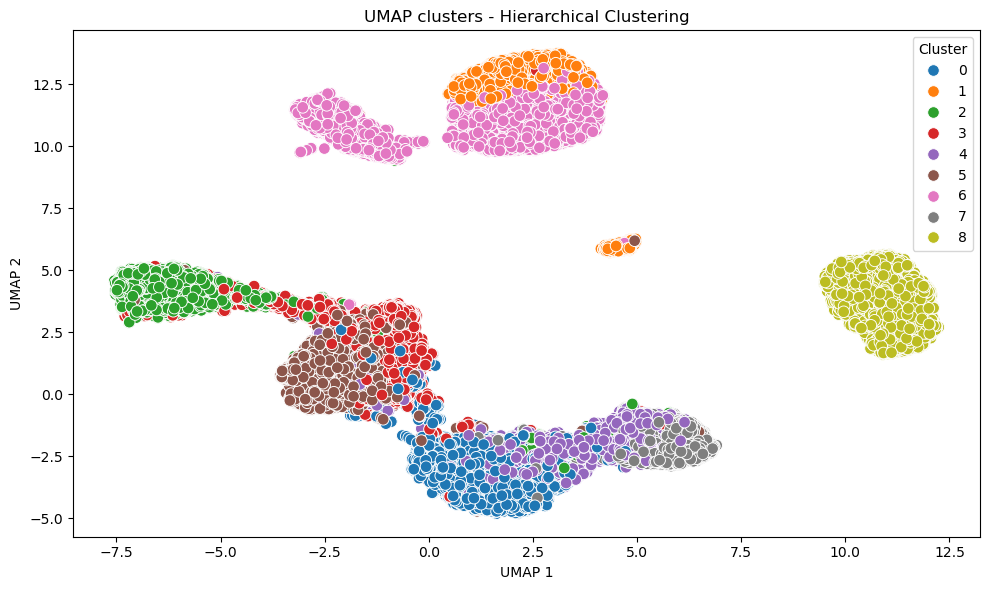

In [11]:
umap_hierarchical(hierarchical_clustering('../Data/customer_info.csv', n_clusters=9, linkage='ward'))

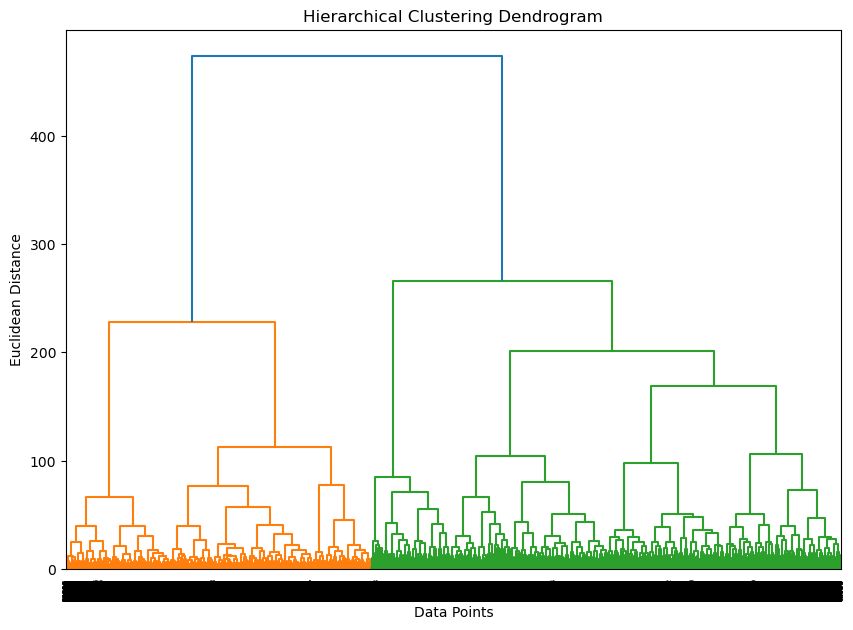

In [13]:
df = preprocess('../Data/customer_info.csv')

X = df[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']].values

# Create linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()